In [44]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

from sklearn.preprocessing import StandardScaler



from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.model_selection import cross_val_score

In [45]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

df = pd.read_csv("data/customer_booking.csv", encoding="cp1252")
df.sample(5)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
38389,7,Internet,RoundTrip,218,5,15,Fri,HKTPEK,Canada,1,0,0,6.42,0
45774,2,Mobile,RoundTrip,28,6,12,Wed,DPSPVG,China,0,0,0,5.33,0
17339,1,Internet,RoundTrip,12,34,9,Mon,KTMMFM,Nepal,1,0,0,4.75,0
35806,1,Internet,RoundTrip,108,5,9,Sat,CGKKIX,Singapore,1,0,0,7.00,0
28880,1,Internet,RoundTrip,7,3,2,Tue,PENPUS,Malaysia,1,1,1,6.33,1


In [46]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [47]:

cat_cols = df.select_dtypes(include = 'object')
num_cols = df.select_dtypes(exclude = 'object')

In [48]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OneHotEncoder
from pandas import get_dummies

In [49]:
cat_cols.columns

Index(['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'], dtype='object')

In [50]:

columns = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']
for val in columns:
    cat_cols = pd.get_dummies(cat_cols, columns = [val], drop_first = True )

In [51]:
cat_cols.shape

(50000, 910)

In [52]:

cat_cols.head()

,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed,route_AKLHGH,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [53]:
num_cols.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,262,19,7,1,0,0,5.52,0
1,1,112,20,3,0,0,0,5.52,0
2,2,243,22,17,1,1,0,5.52,0
3,1,96,31,4,0,0,1,5.52,0
4,2,68,22,15,1,0,1,5.52,0


In [54]:

num_cols['booking_complete'].value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

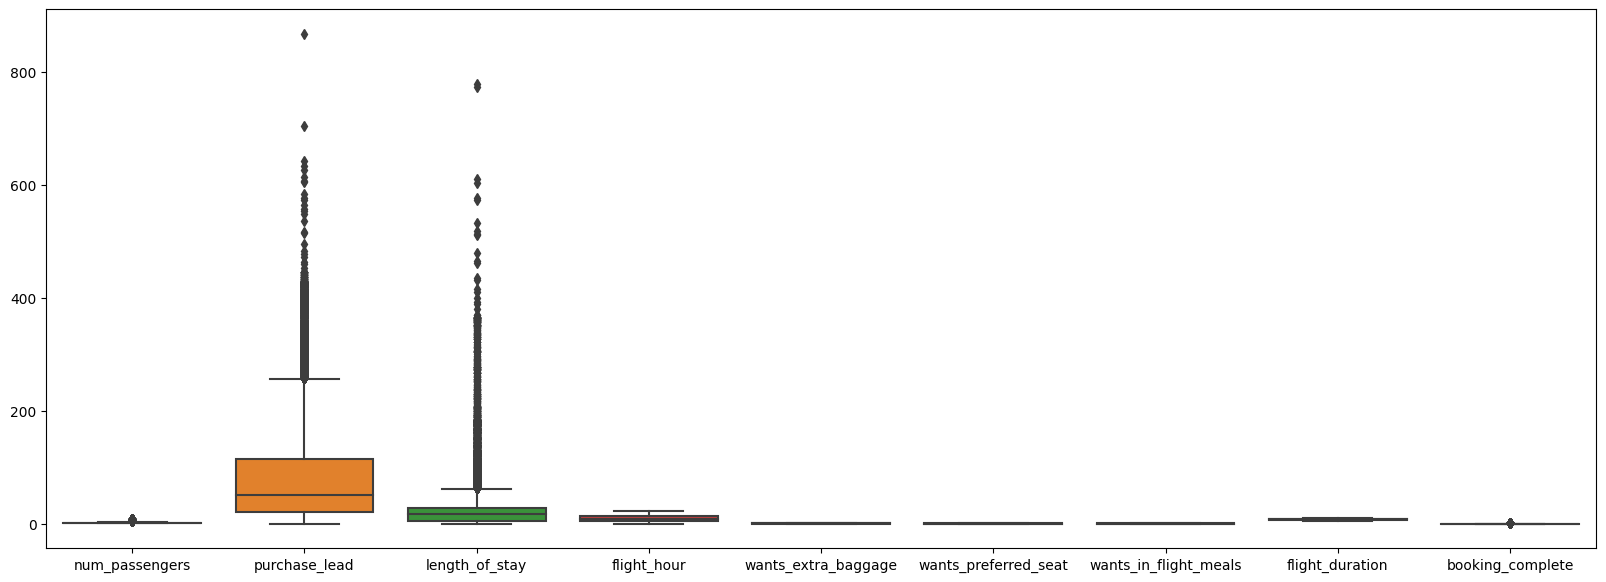

In [55]:
#plot boxplot for outlier detection
plt.figure(figsize=(20,7))
sns.boxplot(data=num_cols)
plt.show()

In [56]:
num_cols.columns

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'flight_duration', 'booking_complete'],
      dtype='object')

In [57]:
#replace outliers with median
col_list = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'flight_duration']

for feature in col_list:
    Q1 = num_cols[feature].quantile(0.25)
    Q3 = num_cols[feature].quantile(0.75)
    IQR = Q3-Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    median = num_cols[feature].median()

    num_cols[feature] = np.where(num_cols[feature]<lower_limit, median, num_cols[feature])
    num_cols[feature] = np.where(num_cols[feature]>upper_limit, median, num_cols[feature])

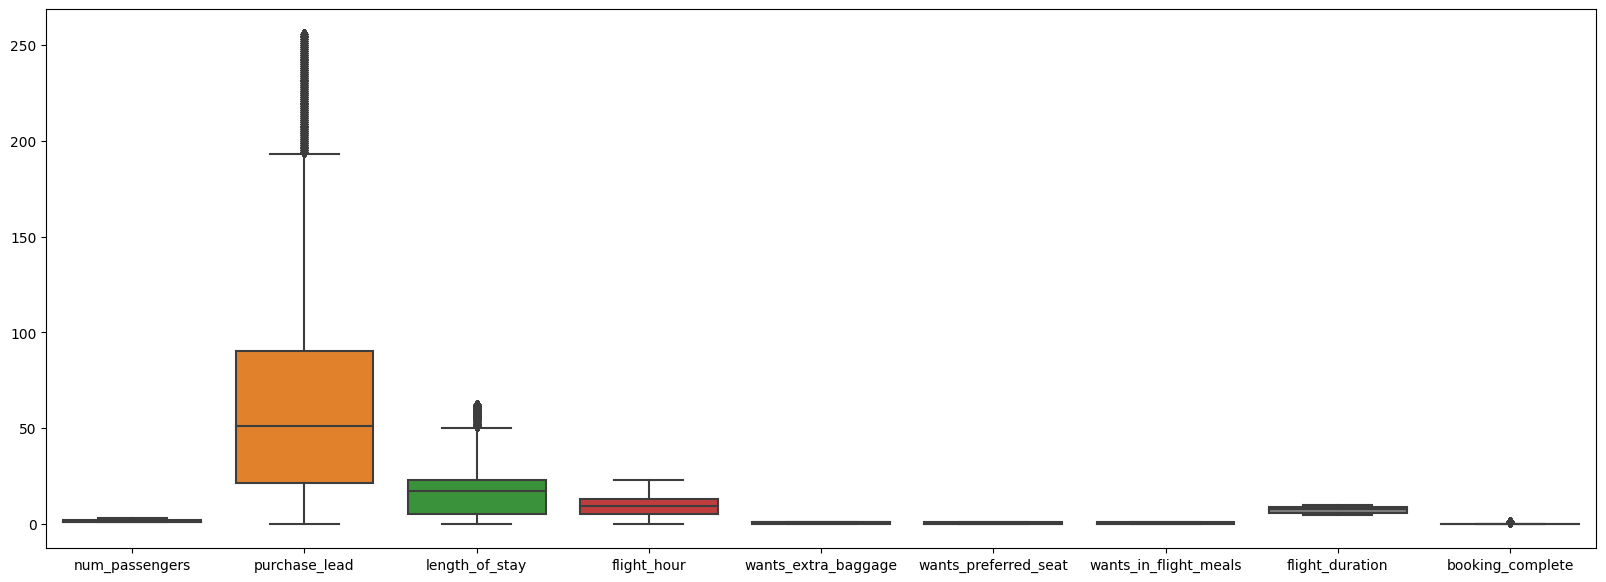

In [58]:
plt.figure(figsize=(20,7))
sns.boxplot(data=num_cols)
plt.show()

In [59]:

#combine both numerical and categorical data
data = pd.concat([cat_cols, num_cols], axis=1)

In [60]:
data.head()


,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed,route_AKLHGH,...,booking_origin_Vietnam,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,False,False,True,False,True,False,False,False,False,False,...,False,2.0,51.0,19.0,7.0,1.0,0.0,0.0,5.52,0
1,False,False,True,False,True,False,False,False,False,False,...,False,1.0,112.0,20.0,3.0,0.0,0.0,0.0,5.52,0
2,False,False,True,False,False,False,False,False,True,False,...,False,2.0,243.0,22.0,17.0,1.0,1.0,0.0,5.52,0
3,False,False,True,False,True,False,False,False,False,False,...,False,1.0,96.0,31.0,4.0,0.0,0.0,1.0,5.52,0
4,False,False,True,False,False,False,False,False,True,False,...,False,2.0,68.0,22.0,15.0,1.0,0.0,1.0,5.52,0


In [61]:

#Seperating target variable and independent variables
X = data.drop(['booking_complete'], axis=1)
y = data['booking_complete']

In [62]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [63]:
X_scaled = pd.DataFrame(X_scaled)
X_scaled

,0,1,2,3,4,5,6,7,8,9,...,908,909,910,911,912,913,914,915,916,917
0,-0.355785,-0.08832,0.100808,-0.439744,2.757334,-0.388399,-0.417577,-0.425769,-0.425802,-0.004472,...,-0.004472,-0.088435,1.056055,-0.246182,0.231165,-0.381764,0.703747,-0.649919,-0.863497,-1.174175
1,-0.355785,-0.08832,0.100808,-0.439744,2.757334,-0.388399,-0.417577,-0.425769,-0.425802,-0.004472,...,-0.004472,-0.088435,-0.630179,0.767907,0.305232,-1.120780,-1.420965,-0.649919,-0.863497,-1.174175
2,-0.355785,-0.08832,0.100808,-0.439744,-0.362669,-0.388399,-0.417577,-0.425769,2.348512,-0.004472,...,-0.004472,-0.088435,1.056055,2.945705,0.453365,1.465775,0.703747,1.538654,-0.863497,-1.174175
3,-0.355785,-0.08832,0.100808,-0.439744,2.757334,-0.388399,-0.417577,-0.425769,-0.425802,-0.004472,...,-0.004472,-0.088435,-0.630179,0.501916,1.119966,-0.936026,-1.420965,-0.649919,1.158082,-1.174175
4,-0.355785,-0.08832,0.100808,-0.439744,-0.362669,-0.388399,-0.417577,-0.425769,2.348512,-0.004472,...,-0.004472,-0.088435,1.056055,0.036433,0.453365,1.096267,0.703747,-0.649919,1.158082,-1.174175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,-0.355785,-0.08832,0.100808,-0.439744,2.757334,-0.388399,-0.417577,-0.425769,-0.425802,-0.004472,...,-0.004472,-0.088435,1.056055,-0.645168,-0.731702,-0.012257,0.703747,-0.649919,1.158082,-1.107368
49996,-0.355785,-0.08832,0.100808,-0.439744,-0.362669,2.574671,-0.417577,-0.425769,-0.425802,-0.004472,...,-0.004472,-0.088435,-0.630179,0.751282,-0.731702,-0.936026,-1.420965,-0.649919,-0.863497,-1.107368
49997,-0.355785,-0.08832,0.100808,-0.439744,2.757334,-0.388399,-0.417577,-0.425769,-0.425802,-0.004472,...,-0.004472,-0.088435,-0.630179,-0.695041,-0.731702,2.389544,-1.420965,-0.649919,1.158082,-1.107368
49998,-0.355785,-0.08832,0.100808,2.274053,-0.362669,-0.388399,-0.417577,-0.425769,-0.425802,-0.004472,...,-0.004472,-0.088435,-0.630179,-0.844661,-0.731702,0.357251,0.703747,-0.649919,1.158082,-1.107368


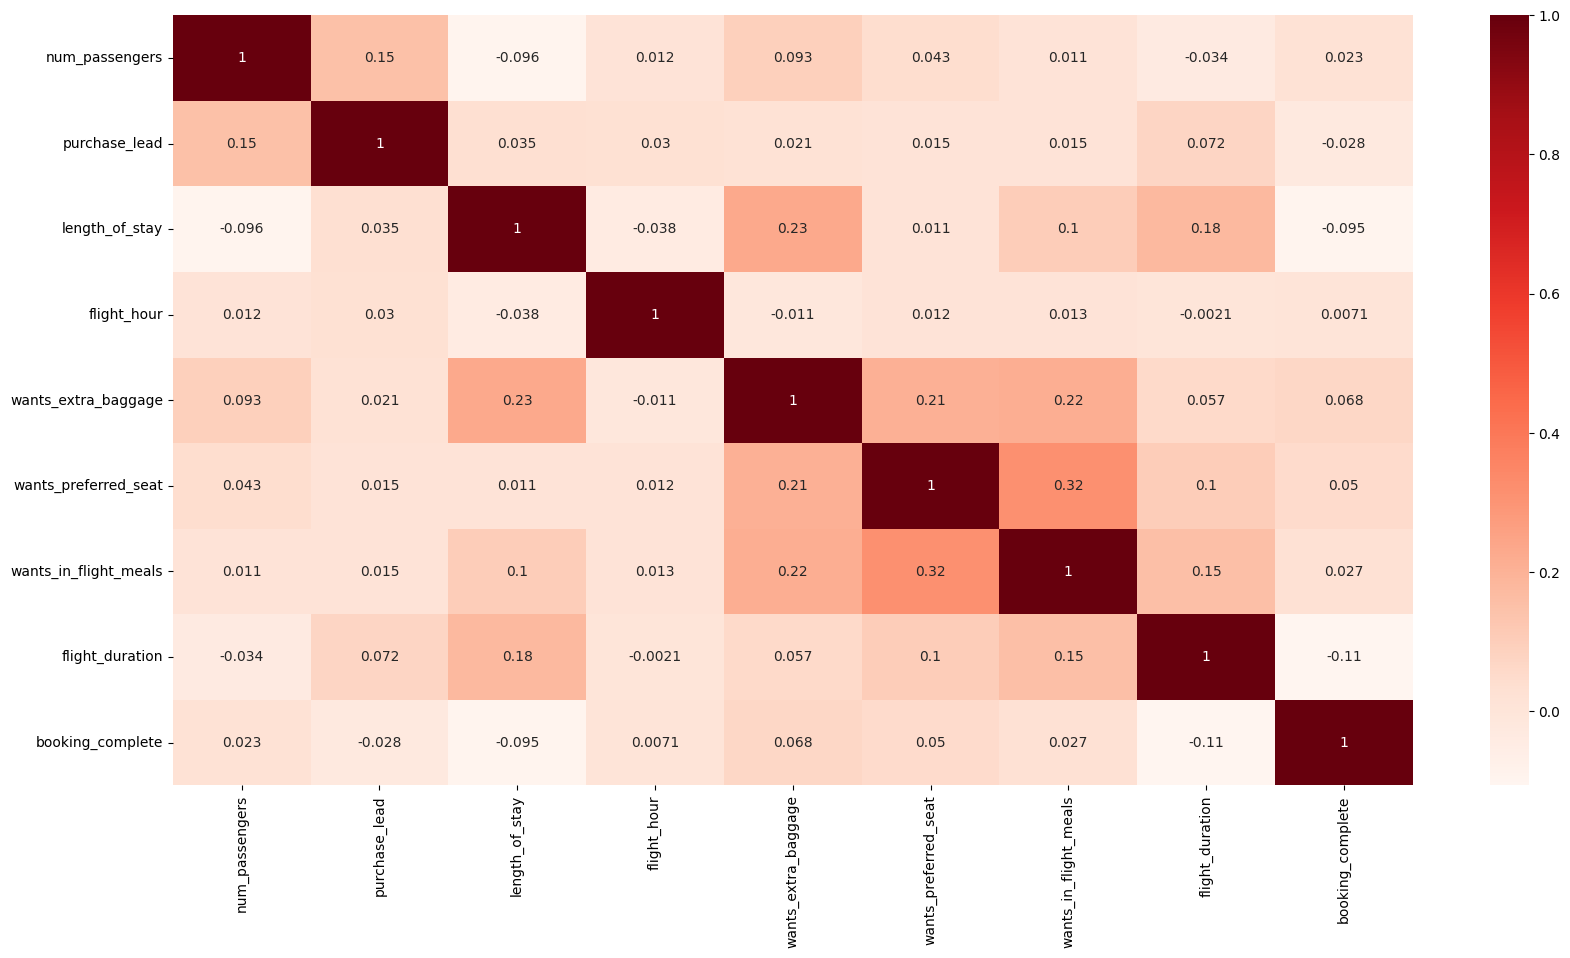

In [64]:
#Correlation heatmap
plt.figure(figsize=(20,10))
sns.heatmap(num_cols.corr(), annot=True, cmap = 'Reds')
plt.show()

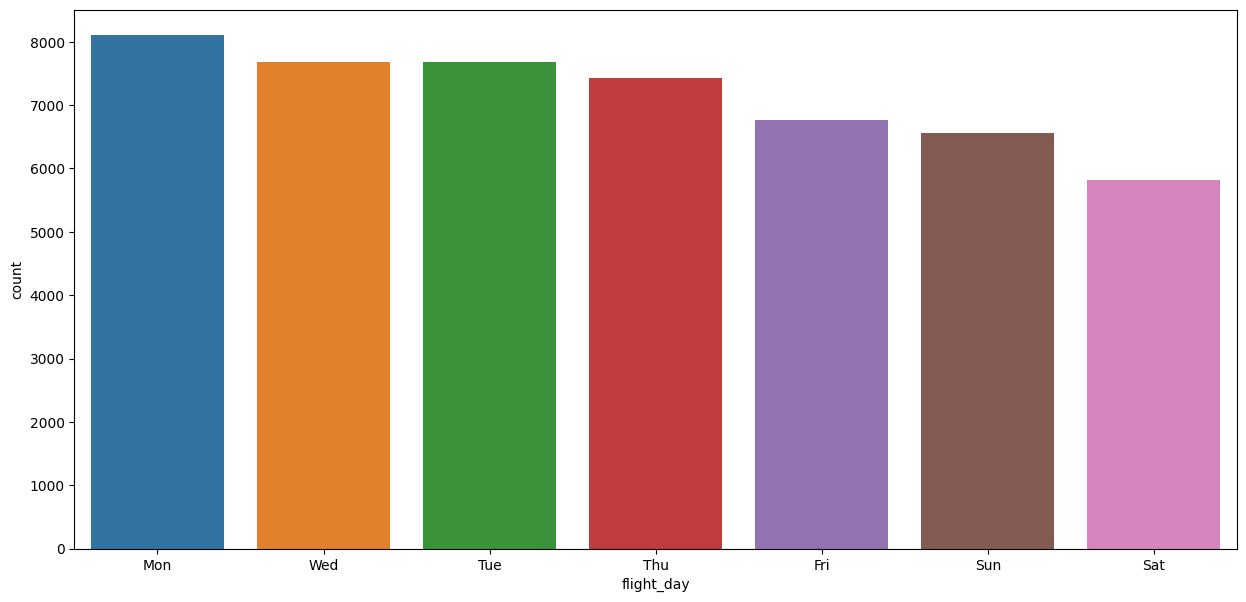

In [65]:
#Number of flights on each day of the week
plt.figure(figsize=(15,7))
sns.countplot(x='flight_day', data=df, order=df['flight_day'].value_counts().index)
plt.show()

In [66]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


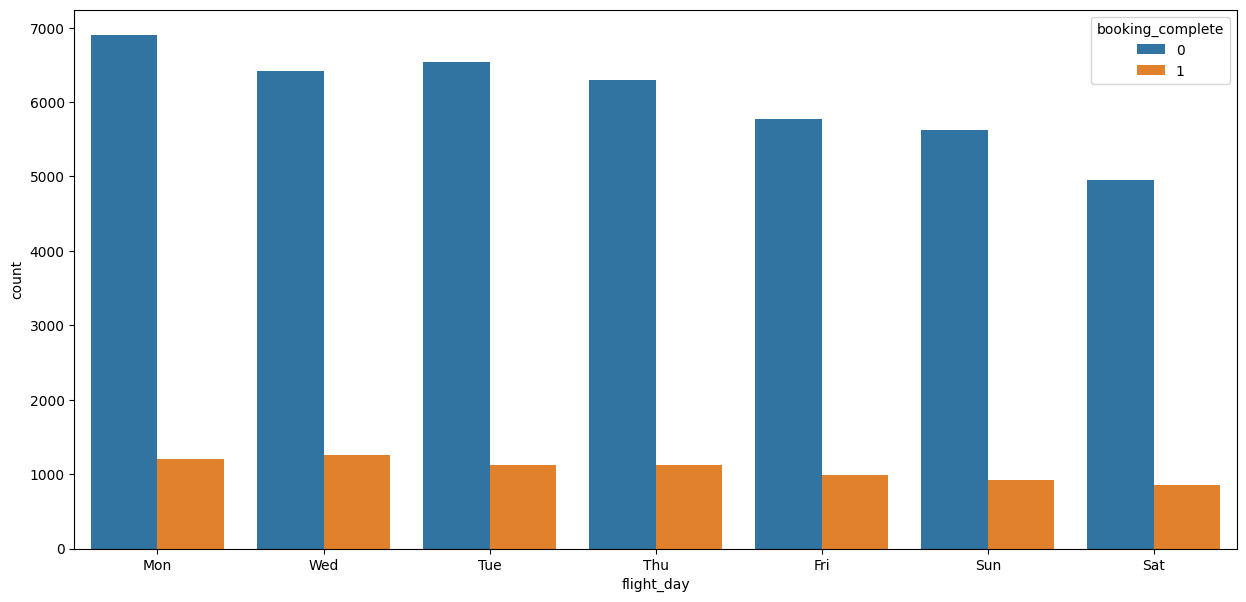

In [67]:
#Number of flights each day of the week
plt.figure(figsize=(15,7))
sns.countplot(x='flight_day', data=df, hue='booking_complete', order = df['flight_day'].value_counts().index)
plt.show()

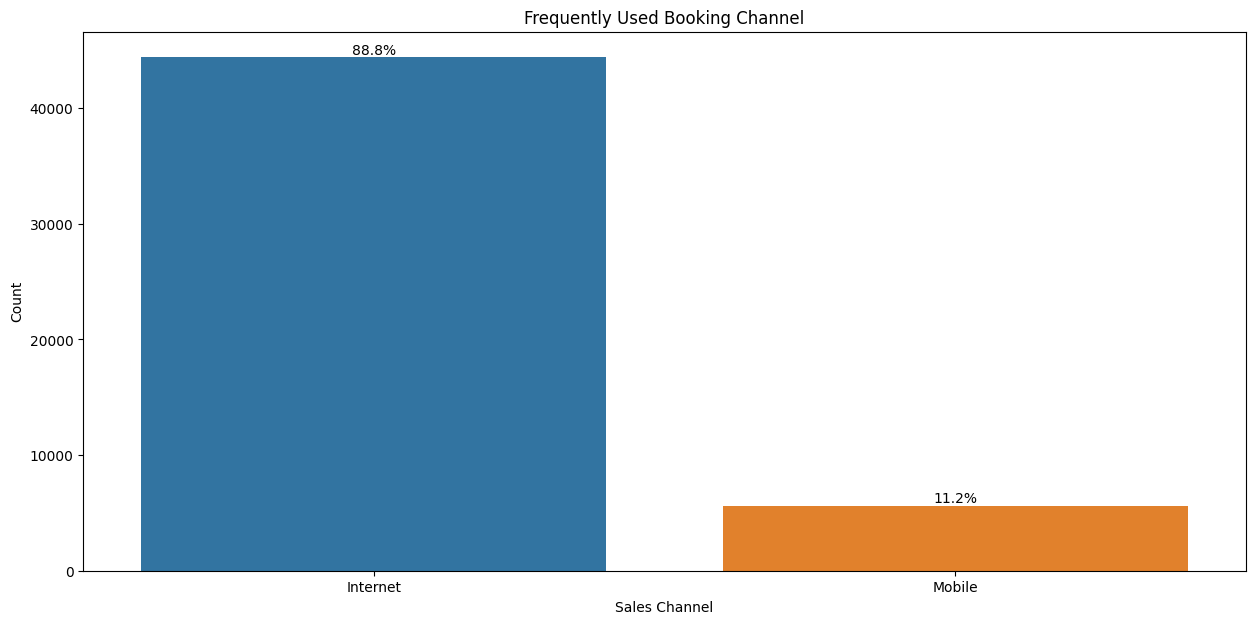

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the percentage for each category
channel_counts = df['sales_channel'].value_counts()
total_count = len(df)
percentages = channel_counts / total_count * 100

# Plot the countplot
plt.figure(figsize=(15, 7))
ax = sns.countplot(x='sales_channel', data=df)

# Add percentage labels to the plot
for p in ax.patches:
    height = p.get_height()
    percentage = height / total_count * 100
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

# Set labels and title
plt.xlabel('Sales Channel')
plt.ylabel('Count')
plt.title('Frequently Used Booking Channel')

# Show the plot
plt.show()

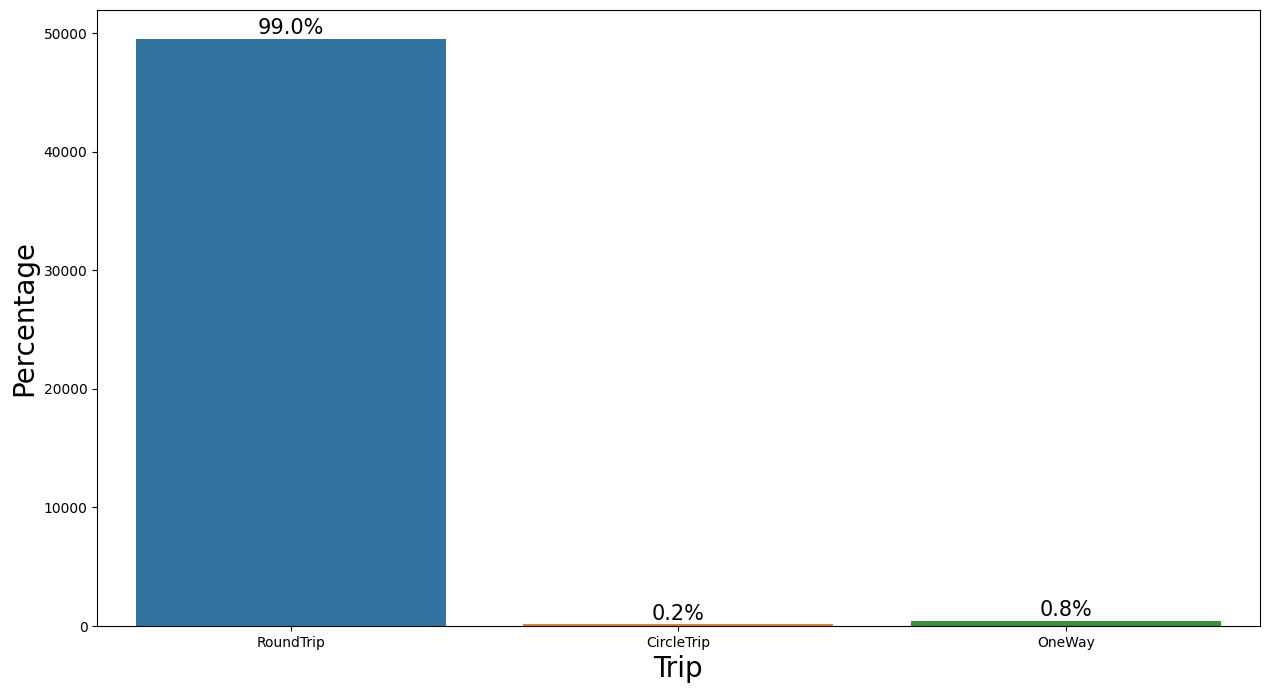

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the percentage for each category
trip_type_counts = df['trip_type'].value_counts()
total_count = len(df)
percentages = trip_type_counts / total_count * 100

# Plot the countplot
plt.figure(figsize=(15, 8))
ax = sns.countplot(x="trip_type", data=df)

# Add percentage labels to the plot
for p in ax.patches:
    height = p.get_height()
    percentage = height / total_count * 100
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2, height), ha='center', va='center', size=15, xytext=(0, 8), textcoords='offset points')

# Set labels and title
plt.xlabel("Trip", fontsize=20)
plt.ylabel("Percentage", fontsize=20)

# Show the plot
plt.show()

In [70]:
from imblearn.over_sampling import SMOTE

In [71]:
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X_scaled, y)
print(x_smote.shape)
print(y_smote.shape)

(85044, 918)
(85044,)


Splitting Dataset to Train and Test

In [72]:
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(59530, 918)
(25514, 918)
(59530,)
(25514,)


Model Building

In [73]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

Prediting Test Data

In [74]:
y_pred_rf_train = rf.predict(X_train)
y_pred_rf_test = rf.predict(X_test)

Evaluate Model Performance

In [75]:
print(confusion_matrix(y_train, y_pred_rf_train))
print("####"*4)
print(confusion_matrix(y_test, y_pred_rf_test))

[[29835     4]
 [    2 29689]]
################
[[11981   702]
 [ 1361 11470]]


In [76]:
print(classification_report(y_train, y_pred_rf_train))
print("####"*14)
print(classification_report(y_test, y_pred_rf_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29839
           1       1.00      1.00      1.00     29691

    accuracy                           1.00     59530
   macro avg       1.00      1.00      1.00     59530
weighted avg       1.00      1.00      1.00     59530

########################################################
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     12683
           1       0.94      0.89      0.92     12831

    accuracy                           0.92     25514
   macro avg       0.92      0.92      0.92     25514
weighted avg       0.92      0.92      0.92     25514



In [77]:
print(accuracy_score(y_train, y_pred_rf_train))
print("####"*5)
print(accuracy_score(y_test, y_pred_rf_test))

0.9998992104821098
####################
0.919142431606177


Cross Validation

In [78]:
accuracy = cross_val_score(rf, X_train, y_train, cv=10)
accuracy

array([0.92172014, 0.91416093, 0.91516882, 0.91332101, 0.91012935,
       0.92390391, 0.923064  , 0.9163447 , 0.91264908, 0.91197715])